d-sandbox

<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://databricks.com/wp-content/uploads/2018/03/db-academy-rgb-1200px.png" alt="Databricks Learning" style="width: 600px">
</div>

# Exploring the Aggregate Sample Data

## Configuration

In [0]:
%run ./includes/configuration

## Load the Sample Data as a Pandas DataFrame

Recall that we wrote the sample data as a Delta table to
the path, `goldPath + "health_tracker_sample_agg"`.

1. Use `spark.read` to read the Delta table as a Spark DataFrame.
2. Use the `.toPandas()` DataFrame method to load the Spark
   DataFrame as a Pandas DataFrame.

In [0]:
# TODO
health_tracker_sample_agg_pd_df = (
  spark.read
  .format("delta")
  .load(goldPath + "health_tracker_sample_agg")
  .toPandas()
)

### Load Scipy Libraries

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Display the Unique Lifestyles

🤔 Remember, Pandas DataFrames use the `.unique()` method to do this.
Spark DataFrames use the `.distinct()` method.

Make sure to specify the correct column, `lifestyle`.

In [0]:
# TODO
lifestyles = health_tracker_sample_agg_pd_df["lifestyle"].unique()
lifestyles

Out[7]: array(['weight trainer', 'sedentary', 'cardio trainer'], dtype=object)

### Create Feature and Target Objects

In [0]:
features = health_tracker_sample_agg_pd_df.select_dtypes(exclude=["object"])
target = health_tracker_sample_agg_pd_df[["lifestyle"]].copy()

### Use `seaborn` to Display a Pair Plot

Generate a `pairplot` of all of the features.

Out[9]:

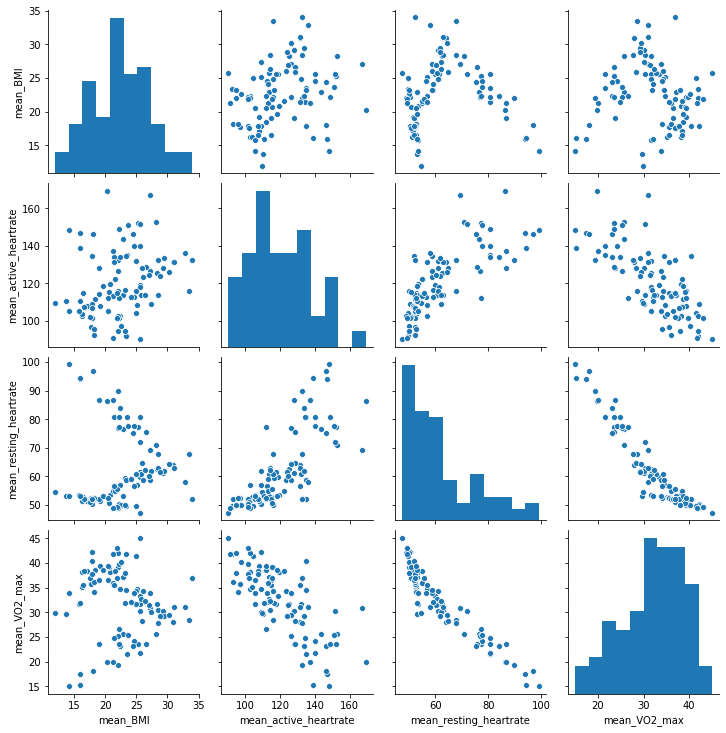

<seaborn.axisgrid.PairGrid at 0x7f926ed058e0>

In [0]:
# TODO
sns.pairplot(features)

### Use `seaborn` to Display a Distribution Plot for Each Feature

Generate a `distplot` for each feature.

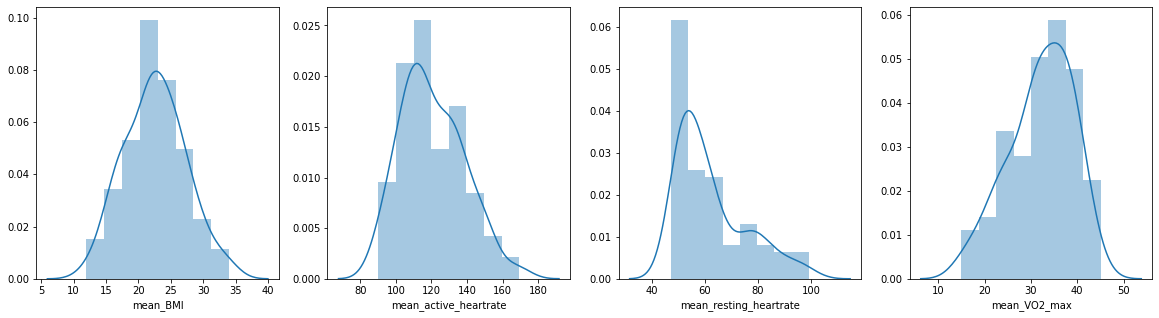

In [0]:
# TODO
fig, ax = plt.subplots(1,4, figsize=(20,5))

for i, feature in enumerate(features):
  sns.distplot(features[feature], ax=ax[i])

### Use `seaborn` to Display a Distribution Plot for Each Feature, Colored by Lifestyle

Generate a `distplot` for each feature.

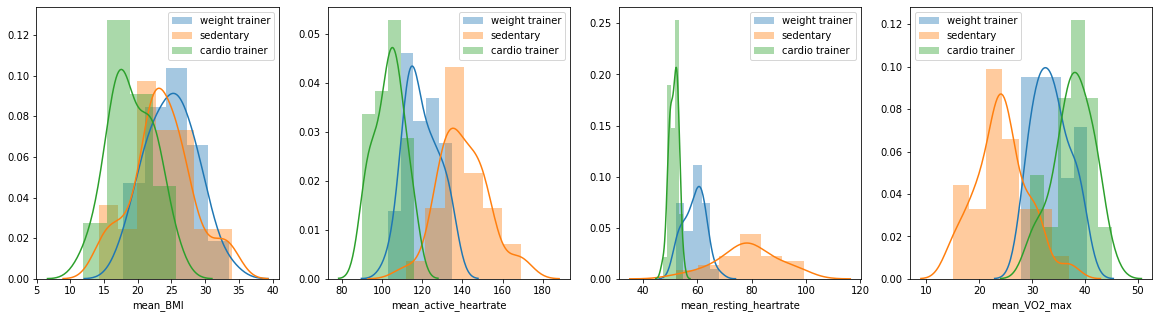

In [0]:
# TODO
fig, ax = plt.subplots(1,4, figsize=(20,5))

for i, feature in enumerate(features):
  for lifestyle in lifestyles:
    subset = features[target["lifestyle"] == lifestyle]
    sns.distplot(subset[feature], ax=ax[i], label=lifestyle)
  ax[i].legend()

### Display a Correlation Plot for Each Feature

1. The `mask` should have the same shape as the `corr`
2. The `sns.heatmap` takes the `corr` as argument as uses the `mask` to mask.

Out[13]:

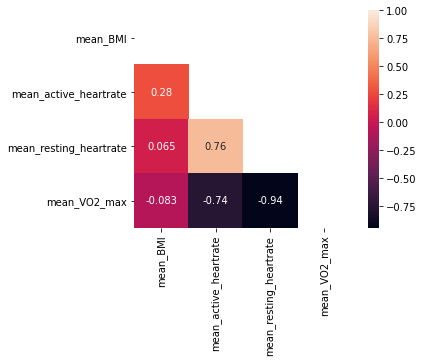

<matplotlib.axes._subplots.AxesSubplot at 0x7f926a85f430>

In [0]:
# TODO
corr = features.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 0)] = True
sns.heatmap(corr, mask=mask, square=True, annot=True)

### Prepare a Two-Dimensional Projection of the Features using T-SNE

You can read more on T-SNE
[here](https://colah.github.io/posts/2014-10-Visualizing-MNIST/).

In [0]:
from sklearn.manifold import TSNE

np.random.seed(10)
tsne = TSNE(n_components=2)

features_in_two_dimensions = tsne.fit_transform(features)
features_in_two_dimensions = pd.DataFrame(features_in_two_dimensions)

### Plot the Two-Dimensional Projection Labeled by Lifestyle

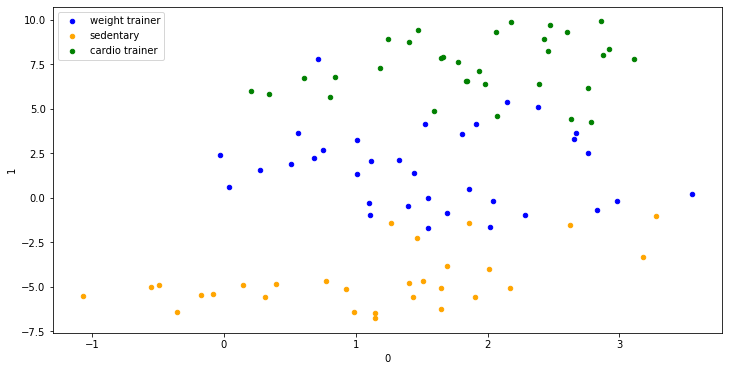

In [0]:
colors = ("blue", "orange", "green")
fig, ax = plt.subplots(1,1,figsize=(12,6))

for color, lifestyle in zip(colors, lifestyles):
  two_dim_per_lifestyle = features_in_two_dimensions[target.lifestyle == lifestyle]
  two_dim_per_lifestyle.plot(x=0, y=1, kind="scatter", c=color, label=lifestyle, ax=ax)


-sandbox
&copy; 2020 Databricks, Inc. All rights reserved.<br/>
Apache, Apache Spark, Spark and the Spark logo are trademarks of the <a href="http://www.apache.org/">Apache Software Foundation</a>.<br/>
<br/>
<a href="https://databricks.com/privacy-policy">Privacy Policy</a> | <a href="https://databricks.com/terms-of-use">Terms of Use</a> | <a href="http://help.databricks.com/">Support</a>